# **Loan Status Prediction with Balanced Random Forest**


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category='FutureWarnings')

In [2]:
data = pd.read_csv(r'C:\Users\Liza Polozenko\OneDrive\Рабочий стол\ML\DATA SCIENCE\PROJECT\datasets\data_cleaned.csv')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0.825081,0.351586,0.796196,0.164823,1,2,0
1,0,1,0,1,1,-0.404445,-0.911043,-1.438968,0.164823,1,1,1
2,0,1,0,0,0,-0.728331,1.063280,0.507788,0.164823,1,1,1
3,0,0,0,1,0,1.925674,-0.911043,1.264859,0.164823,1,1,1
4,0,1,0,0,0,-0.922508,0.358284,-0.393488,0.164823,1,1,1


In [3]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis=1)

In [ ]:
# SMOTE realization
sm = SMOTE(random_state=42, k_neighbors=5)

x_res, y_res = sm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=20)

# Random Forest realization
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

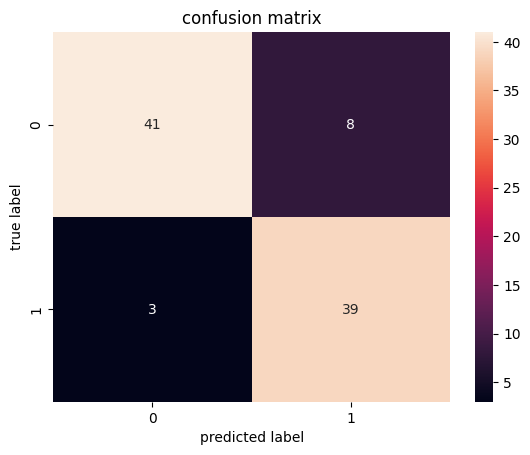

In [6]:
y_pred_test = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("confusion matrix")
plt.show()

In [7]:
df_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).transpose()
df_report

,precision,recall,f1-score,support
0,0.931818,0.836735,0.881720,49.000000
1,0.829787,0.928571,0.876404,42.000000
accuracy,0.879121,0.879121,0.879121,0.879121
macro avg,0.880803,0.882653,0.879062,91.000000
weighted avg,0.884727,0.879121,0.879267,91.000000


In [8]:
df_report.to_csv("classification_report_random_forest.csv")